## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[ 11,  36,  58],
       [  5,  14,  99],
       [ 32,  72,  87],
       [ 27,  94,  96],
       [ 22,  44,  45],
       [ 15,  66, 100]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([11, 36, 58]), array([ 5, 14, 99]))

The lowest card in the game is

In [5]:
np.min(cards)

5

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

(array([176.,   0.,   0., 143.,   0.,   0., 135.,   0.,   0.,   0., 114.,
          0.,   0.,  80.,   0.,   0.,  71.,   0.,   0.,   0.,  58.,   0.,
          0.,  32.,   0.,   0.,  36.,   0.,   0.,   0.,  26.,   0.,   0.,
         30.,   0.,   0.,  10.,   0.,   0.,   0.,  20.,   0.,   0.,  12.,
          0.,   0.,  10.,   0.,   0.,   0.,   6.,   0.,   0.,   6.,   0.,
          0.,   9.,   0.,   0.,   0.,   5.,   0.,   0.,   5.,   0.,   0.,
          2.,   0.,   0.,   0.,   4.,   0.,   0.,   6.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
         4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
         7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. , 10.3, 10.6,
        10.9, 11.2, 11.5, 11.8, 12.1, 12.4, 12.7, 13. , 13.3, 13.6, 13.9,
        14.2, 14.5, 14

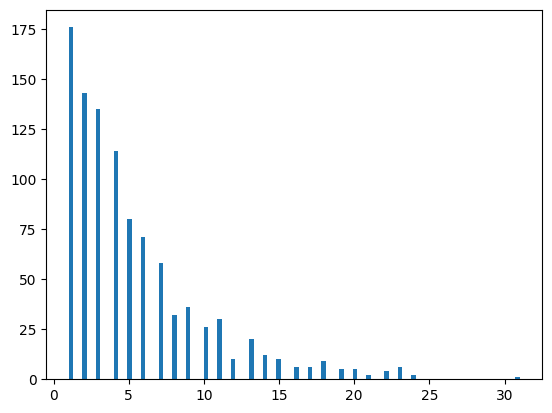

In [7]:
N = 100
n = 6
k = 3
min_card = []

for i in range(1, 1000):
    cards = sample_cards(N, n, k)
    min_card.append(np.min(cards))

plt.hist(min_card, bins = N)

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

mean: 16.995799579957996


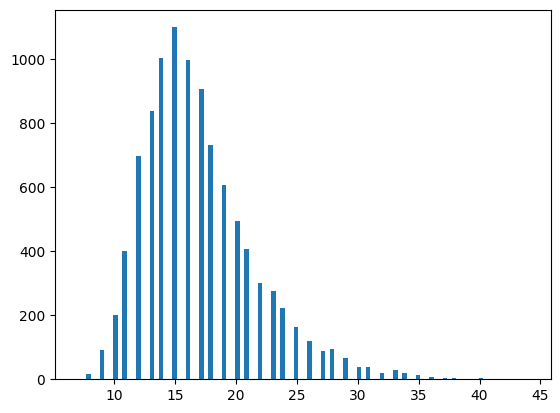

In [8]:
gaps = []
max_gap = 0

for i in range(1, 10000):
    cards = sample_cards(N, n, k)
    cards = cards.flatten()
    cards.sort()

    for j in range(n * k - 1):
        if abs(cards[j] - cards[j + 1]) > max_gap:
            max_gap = abs(cards[j] - cards[j + 1])
    gaps.append(max_gap)
    max_gap = 0

plt.hist(gaps, bins = N) 
print("mean: {}".format(np.mean(gaps)))

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

16.39540395403954


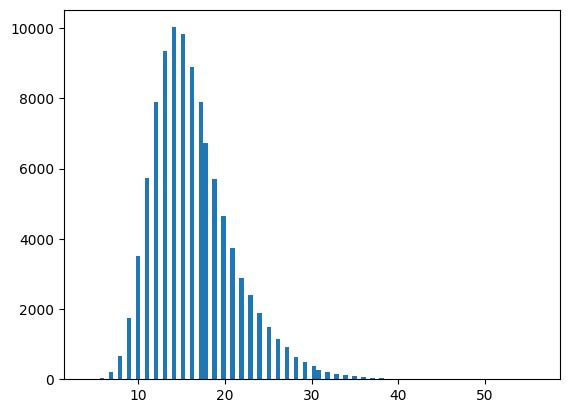

In [9]:
gap_diff_play = []
max_gap_diff_play = 0
cards_per_player = N / n

for i in range(1, 100000):
    cards = sample_cards(N, n, k)
    cards = cards.flatten()
    players = []
    for player_idx in range(n):
        players += [player_idx] * k 
    idx = np.argsort(cards)
    cards.sort()
    for j in range(len(cards) - 1):
        if (abs(cards[j] - cards[j + 1]) > max_gap_diff_play)\
            and (players[idx[j]] is not players[idx[j + 1]]):
            max_gap_diff_play = abs(cards[j] - cards[j + 1])
    gap_diff_play.append(max_gap_diff_play)
    max_gap_diff_play = 0

plt.hist(gap_diff_play, bins = N)
print(np.mean(gap_diff_play))





How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

Players:     4	Cards per:     1	Mean gap (all): 36.720872	Mean gap (diff): 36.563816
Players:     5	Cards per:     1	Mean gap (all): 34.729473	Mean gap (diff): 34.503615
Players:     6	Cards per:     1	Mean gap (all): 32.192619	Mean gap (diff): 32.313003
Players:     7	Cards per:     1	Mean gap (all): 30.133913	Mean gap (diff): 30.203212
Players:     8	Cards per:     1	Mean gap (all): 28.305631	Mean gap (diff): 28.253943
Players:     9	Cards per:     1	Mean gap (all): 26.821382	Mean gap (diff): 26.551566


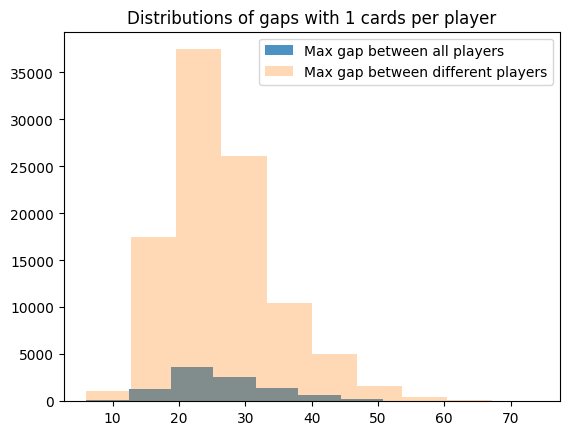

Players:     4	Cards per:     2	Mean gap (all): 28.237624	Mean gap (diff): 26.613546
Players:     5	Cards per:     2	Mean gap (all): 25.197520	Mean gap (diff): 24.020080
Players:     6	Cards per:     2	Mean gap (all): 22.413041	Mean gap (diff): 21.717917
Players:     7	Cards per:     2	Mean gap (all): 20.310931	Mean gap (diff): 19.784088
Players:     8	Cards per:     2	Mean gap (all): 18.595860	Mean gap (diff): 18.132011
Players:     9	Cards per:     2	Mean gap (all): 17.058706	Mean gap (diff): 16.706177


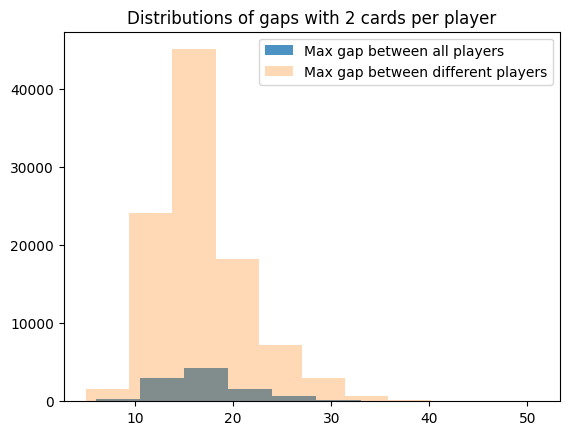

Players:     4	Cards per:     3	Mean gap (all): 22.378838	Mean gap (diff): 21.010110
Players:     5	Cards per:     3	Mean gap (all): 19.343334	Mean gap (diff): 18.463705
Players:     6	Cards per:     3	Mean gap (all): 16.977598	Mean gap (diff): 16.399904
Players:     7	Cards per:     3	Mean gap (all): 15.204220	Mean gap (diff): 14.701477
Players:     8	Cards per:     3	Mean gap (all): 13.581458	Mean gap (diff): 13.308233
Players:     9	Cards per:     3	Mean gap (all): 12.364236	Mean gap (diff): 12.130811


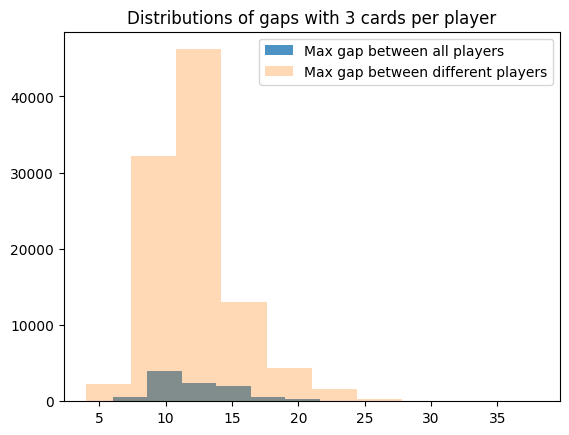

Players:     4	Cards per:     4	Mean gap (all): 18.457346	Mean gap (diff): 17.301443
Players:     5	Cards per:     4	Mean gap (all): 15.780878	Mean gap (diff): 14.967120
Players:     6	Cards per:     4	Mean gap (all): 13.653165	Mean gap (diff): 13.126951
Players:     7	Cards per:     4	Mean gap (all): 12.012101	Mean gap (diff): 11.675997
Players:     8	Cards per:     4	Mean gap (all): 10.686669	Mean gap (diff): 10.417624
Players:     9	Cards per:     4	Mean gap (all): 9.578458	Mean gap (diff): 9.392714


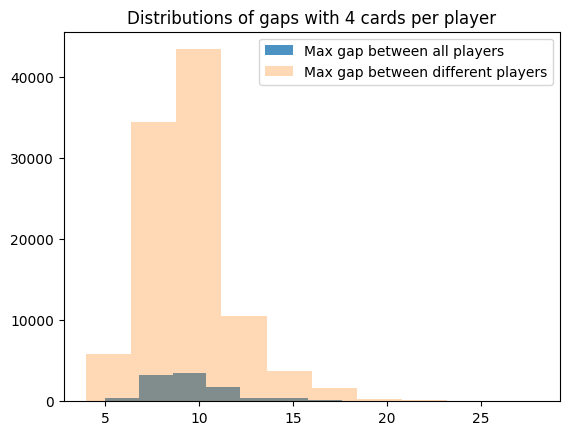

In [10]:
def gap_all_players(N, n, k, mean = False, sample = sample_cards):
    """Function to find the max gap between all players 

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        mean: Boolean to return just the mean
        sample: Function to use to perform sampling

    Returns:
        min_card: list containing all gaps 
        np.mean: the mean of all gaps
    """
    gaps = []
    max_gap = 0

    for i in range(1, 10000):
        cards = sample(N, n, k)
        cards = cards.flatten()
        cards.sort()

        for j in range(n * k - 1):
            if abs(cards[j] - cards[j + 1]) > max_gap:
                max_gap = abs(cards[j] - cards[j + 1])
        gaps.append(max_gap)
        max_gap = 0

    if mean:
        return np.mean(gaps)

    return gaps

def gap_diff_players(N, n, k, mean = False, sample = sample_cards):
    """Function to find the max gap between different players 

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        mean: Boolean to return just the mean
        sample: Function to use to perform sampling

    Returns:
        min_card: list containing all gaps 
        np.mean: the mean of all gaps
    """
    gap_diff_play = []
    max_gap_diff_play = 0
    cards_per_player = N / n

    for i in range(1, 100000):
        cards = sample(N, n, k)
        cards = cards.flatten()
        players = []
        for player_idx in range(n):
            players += [player_idx] * k 
        idx = np.argsort(cards)
        cards.sort()
        for j in range(len(cards) - 1):
            if (abs(cards[j] - cards[j + 1]) > max_gap_diff_play)\
                and (players[idx[j]] is not players[idx[j + 1]]):
                max_gap_diff_play = abs(cards[j] - cards[j + 1])
        gap_diff_play.append(max_gap_diff_play)
        max_gap_diff_play = 0

    if mean:
        return np.mean(gap_diff_play)

    return gap_diff_play

def main():
    for ncards_per_player in np.arange(1, 5):
        for nplayers in np.arange(4, 10):
            mean_gap_all = gap_all_players(N, nplayers, ncards_per_player, mean = True)
            mean_gap_diff = gap_diff_players(N, nplayers, ncards_per_player, mean = True)
            print("Players: {:5}\tCards per: {:5}\tMean gap (all): {:f}\tMean gap (diff): {:f}"\
                  .format(nplayers, ncards_per_player, mean_gap_all, mean_gap_diff))
            gap_all = gap_all_players(N, nplayers, ncards_per_player)
            gap_diff = gap_diff_players(N, nplayers, ncards_per_player) 


        plt.hist(gap_all, alpha = 0.8, label='Max gap between all players')
        plt.hist(gap_diff, alpha = 0.3, label='Max gap between different players')

        plt.legend(loc='upper right')
        plt.title("Distributions of gaps with {} cards per player".format(ncards_per_player))
        plt.show()

if __name__ == "__main__":
    main()


I noticed that across the board, as the number of players increased, the mean gap (regardless of all or different players) decreased. This is expected behavior -- as we hold the number of cards per player constant, we should expect to see that as the number of players increase, there is more likely for someone else to have a card close to yours. What is interesting to note though, is that as the number of cards per player increased, the mean gaps across the board decreased. 

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

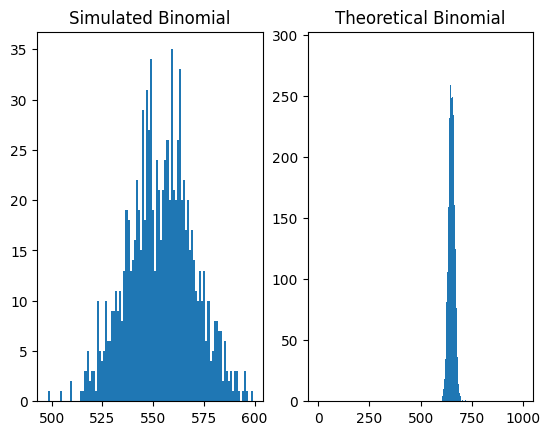

In [11]:
# To simulate binomial distribution, we create a sequence of Bernoulli r.v.
# Since we know the distribution of minimum values is skewed right, we can use that to simulate the Bernoulli

from scipy.stats import binom

# Initialization
N = 100
n = 6
k = 3
t = 5
n_iter = 1000

# Creating functions for simulation
def sim_bernoulli(N: int, n: int, k: int, t: int, sample = sample_cards) -> int:
    """Simulate a bernoulli r.v. by taking a sample of cards and asking if min of the sample is less than a threshold

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        t: Threshold for the minimum
        sample: Function to use to perform sampling
        
    Returns:
        is_smaller: int representing a boolean
    """
    is_smaller = 1
    cards = sample(N, n, k)
    if np.min(cards) < t:
        return is_smaller 
    else:
        is_smaller = 0
        return is_smaller 

def sim_binomial(N: int, n: int, k: int, t: int, n_iter: int, sample = sample_cards) -> int:
    """Simulate a binomial r.v. using the bernoulli r.v.

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        t: Threshold for the minimum
        n_iter: Number of simulation iterations
        sample: Function to use to perform sampling
        
    Returns:
        success_count: number of successes in n_iter
    """
    success_count = 0
    for i in range(n_iter):
        if sim_bernoulli(N, n, k, t, sample) == 1:
            success_count += 1
     
    return success_count

def print_info(results: list) -> None:
    """Plot binomial distribution and results of simulation

    Args:
        results: results from simulation
    Returns:
        None
    """
    binom_true = np.random.binomial(n_iter, 0.65, 10000)
    bin = np.arange(0, n_iter, 1)

    # Plotting
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(results, bins = N)
    axes[0].set_title("Simulated Binomial")
    axes[1].hist(binom_true, bins = bin)
    axes[1].set_title("Theoretical Binomial")
    plt.show()
    
def main():
    # Simulation driver code
    sim_results = []
    for i in range(n_iter):
        sim_results.append(sim_binomial(N, n, k, t, n_iter))
    
    # Visualizing results
    print_info(sim_results)

if __name__ == "__main__":
    main()


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

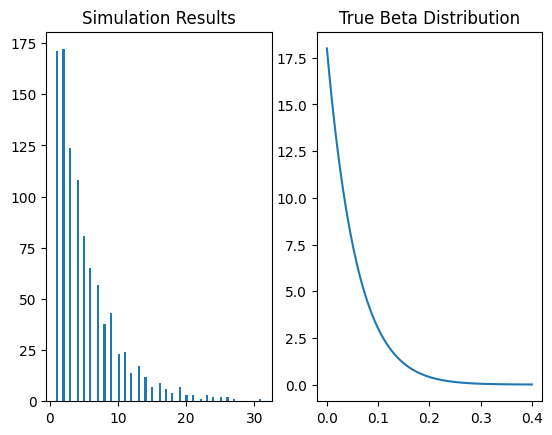

In [12]:
from scipy.stats import beta

# Initialization
N = 100
n = 6
k = 3
n_iter = 1000

def sim_min(N: int, n: int, k: int, n_iter: int, sample = sample_cards) -> list:
    """Simulate games and get the min card value

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        sample: Function to use to perform sampling
    Returns:
        min_card: list containing minimum values
    """
    min_card = []
    for i in range(n_iter):
        cards = sample(N, n, k)
        min_card.append(np.min(cards))

    return min_card

def make_plots(sim_results: list) -> None:
    """Plot beta distribution and results of simulation

    Args:
        sim_results: results from simulation
    Returns:
        None
    """
    # create beta distribution
    a = 1
    b = n * k + 1 - a
    x = np.linspace(0, 0.4, 10000)
    beta_sim = beta.pdf(x, a, b)
    bins = np.arange(0, n_iter, 1)

    # Plotting
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(sim_results, bins = N)
    axes[0].set_title("Simulation Results")
    axes[1].plot(x, beta_sim)
    axes[1].set_title("True Beta Distribution")
    plt.show()

def main():
    sim_minimum = sim_min(N, n, k, n_iter)
    make_plots(sim_minimum)

if __name__ == "__main__":
    main()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

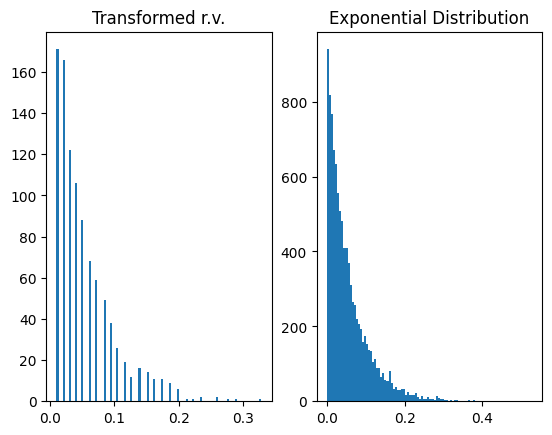

In [13]:

# Initialization
N = 100
n = 6
k = 3
n_iter = 1000

def x_pdf(U: list, N: int) -> list:
    """Transformed random variable X

    Args:
        U: list with the mins
        N: number of cards
    
    Returns:
        x: transformed r.v.
    """
    u = np.array(U)
    x = - np.log(1 - u / N )
    return x

def make_plots(x: list) -> None:
    """Plot exponential distribution and results of simulation

    Args:
        x: results from simulation
    Returns:
        None
    """
    # generate exponential pdf
    n_points = np.linspace(0, 0.4, 10000)
    s = 1 / (n * k)
    expo = np.random.exponential(s, len(n_points))

    # Plotting
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(x, bins = N)
    axes[0].set_title("Transformed r.v.")
    axes[1].hist(expo, bins = N)
    axes[1].set_title("Exponential Distribution")
    plt.show()

def main():
    U = sim_min(N, n, k, n_iter)
    x = x_pdf(U, N)
    make_plots(x)


if __name__ == "__main__":
    main()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

Suppose that we were sampling with replacement. This means that our result from drawing for one player is completely independent
of drawing for the other players. In theory, I would expect to see our simulation results to be closer to the true distributions
since we would be taking i.i.d. samples. However, I feel like sampling with replacement introduces some strange edge cases, 
namely the case where two players both get the same minimum card. Additionally, I feel like we might not necessarily get the same behavior with the differences when sampling with replacement, but that's more of an intuitive gut feeling rather than a 
mathematical hypothesis. 

If we are to set $n \cdot k << N$, we are taking a very, very small subset of the total card population. As a result of this, I would expect to see very few duplicate cards drawn despite the fact that we are sampling with replacement. I think by doing this, we would be able to get our best approximation of the true distributions.


Max Gap simulation successful!
Binomial simulation successful!
Beta simulation successful!
Exponential simulation successful!


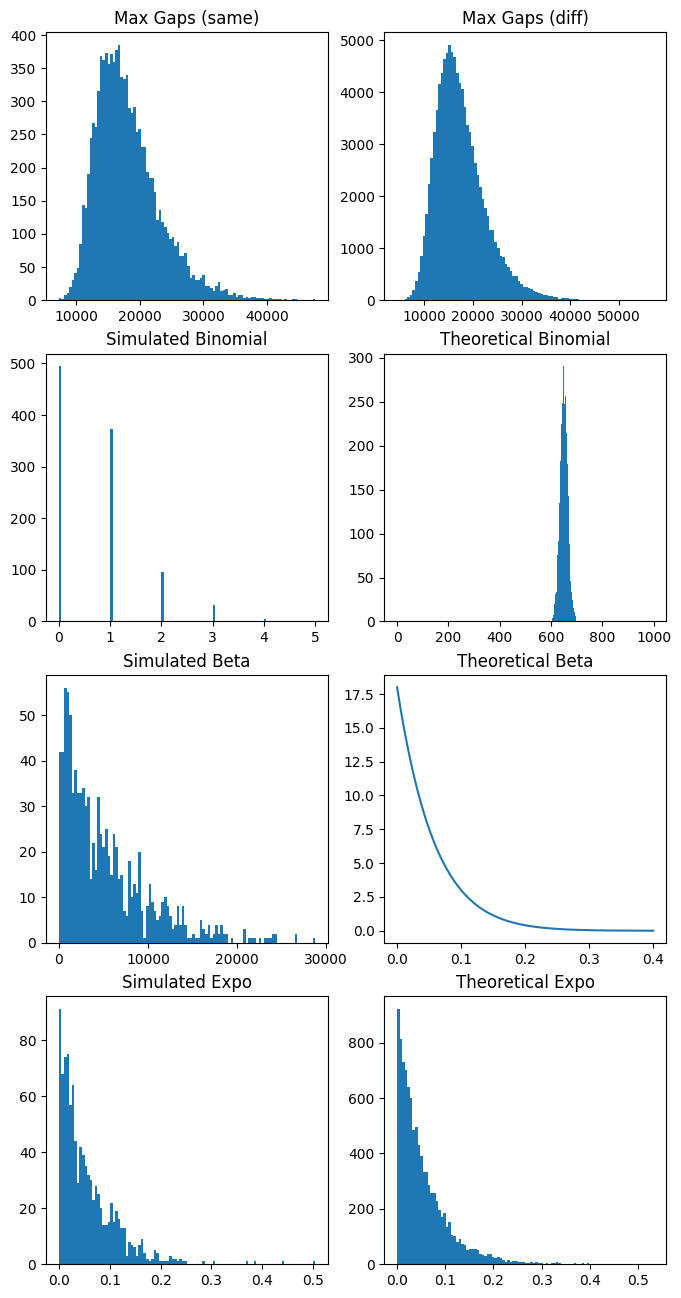

In [14]:
class Experiments:
    """A class used to run our experiments
    """

    t = 5 # threshold used for the binomial simulation    

    def __init__(self, N, n, k, n_iter):
        self.N = N
        self.n = n
        self.k = k
        self.n_iter = n_iter
        self.sample = sample_with_replacement
    
        # numpy array containing results of experiments
        # results[0] = gaps between all players
        # results[1] = gaps between diff players
        # results[2] = binomial results
        # results[3] = beta results
        # results[4] = exponential results
        self.results = np.empty(shape = 5, dtype = np.ndarray)
    
    def simulate_gaps(self):
        gap_all_results = gap_all_players(self.N, self.n, self.k, False, self.sample)
        gap_diff_results = gap_diff_players(self.N, self.n, self.k, False, self.sample)
        self.results[0] = gap_all_results
        self.results[1] = gap_diff_results
        print("Max Gap simulation successful!")

    def simulate_binom(self):
        # Perform simulation
        binom_results = []
        for i in range(n_iter):
            binom_results.append(sim_binomial(self.N, self.n, self.k, self.t, self.n_iter, self.sample))

        # Update results array
        self.results[2] = binom_results
        print("Binomial simulation successful!")

    def simulate_beta(self):
        beta_results = sim_min(self.N, self.n, self.k, self.n_iter, self.sample)
        self.results[3] = beta_results
        print("Beta simulation successful!")

    def simulate_expo(self):
        U = sim_min(self.N, self.n, self.k, self.n_iter, self.sample)
        expo_results = x_pdf(U, self.N)
        self.results[4] = expo_results
        print("Exponential simulation successful!")

    def show_results(self):

        # Generate true distributions
        # binom
        binom_true = np.random.binomial(n_iter, 0.65, 10000)
        bin = np.arange(0, n_iter, 1)

        # beta
        a = 1
        b = n * k + 1 - a
        x = np.linspace(0, 0.4, 10000)
        beta_sim = beta.pdf(x, a, b)
        bins = np.arange(0, n_iter, 1)

        # generate exponential pdf
        n_points = np.linspace(0, 0.4, 10000)
        s = 1 / (n * k)
        expo = np.random.exponential(s, len(n_points))

        # Plotting
        fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 16))

        # results from gaps
        axes[0][0].hist(self.results[0], bins = N)
        axes[0][0].set_title("Max Gaps (same)")
        axes[0][1].hist(self.results[1], bins = N)
        axes[0][1].set_title("Max Gaps (diff)")

        # binomial 
        axes[1][0].hist(self.results[2], bins = N)
        axes[1][0].set_title("Simulated Binomial")
        axes[1][1].hist(binom_true, bins = bin)
        axes[1][1].set_title("Theoretical Binomial")

        # beta
        axes[2][0].hist(self.results[3], bins = N)
        axes[2][0].set_title("Simulated Beta")
        axes[2][1].plot(x, beta_sim)
        axes[2][1].set_title("Theoretical Beta")

        # expo
        axes[3][0].hist(self.results[4], bins = N)
        axes[3][0].set_title("Simulated Expo")
        axes[3][1].hist(expo, bins = N)
        axes[3][1].set_title("Theoretical Expo")

        plt.show()

def sample_with_replacement(N: int, n: int, k: int):
    """Simulate a sample of cards with replacement (copied from sample_cards() above)
    
    Args: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a = np.arange(1, N + 1), size = n * k, replace = True)
    _cards = _cards.reshape(n, k)
    _cards.sort(axis = 1)
    return _cards

def main():
    # Initialization
    N = 100000
    n = 6
    k = 3
    n_iter = 1000
    
    # Run experiments
    ex = Experiments(N, n, k, n_iter)
    ex.simulate_gaps()
    ex.simulate_binom()
    ex.simulate_beta()
    ex.simulate_expo()

    # Show results
    ex.show_results()    
    
if __name__ == "__main__":
    main()


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Austin Tao (alt2177)
- Member No2: Frederik Stihler (fstihler)
- Member No3: 
